Shape of dataset:  (159, 16)
Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872




CLUSTERING using SCIPY


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:58: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D ar

                 horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   450.000000  8.000000  16.000000  69.725000
         1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   118.500000  1.890000  29.550000  14.226100
         1.0   129.666667  2.300000  22.333333  14.292000
2        0.0   203.615385  3.284615  24.223077  27.988692
         1.0   182.000000  3.420000  20.300000  26.120600
3        0.0   168.107143  2.557143  25.107143  24.693786
         1.0   155.600000  2.840000  22.000000  19.807000
4        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   173.000000  3.180000  20.600000  24.308400
5        0.0    55.000000  1.000000  45.000000   9.235000


Text(0, 0.5, 'mpg')

<Figure size 1296x3600 with 0 Axes>

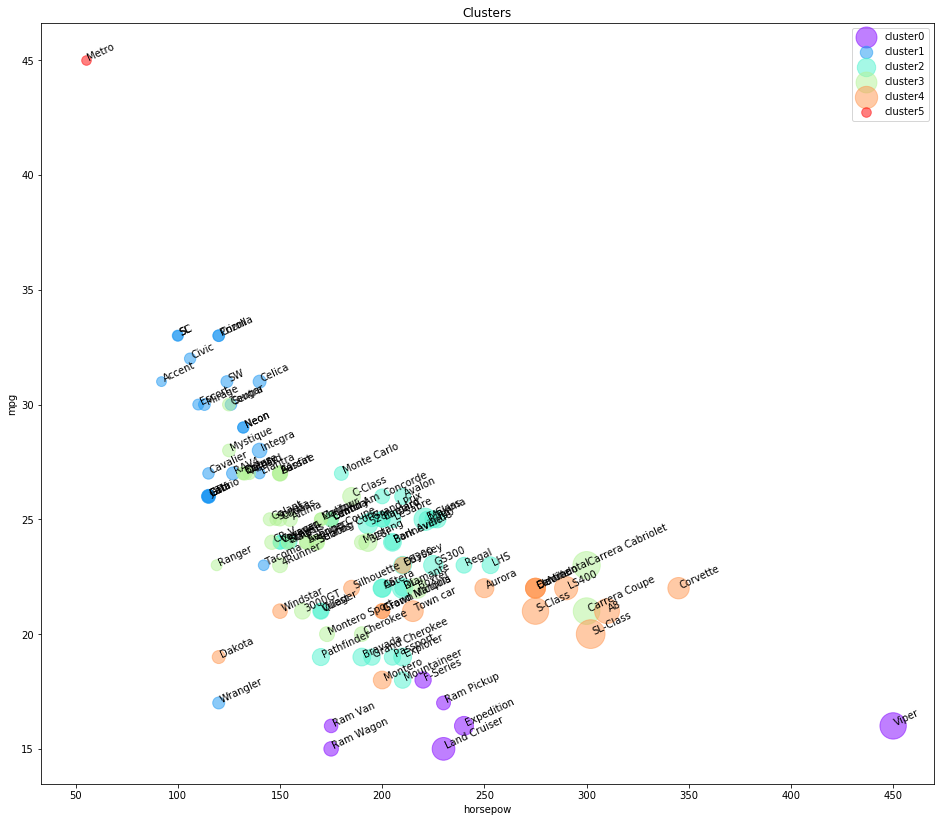

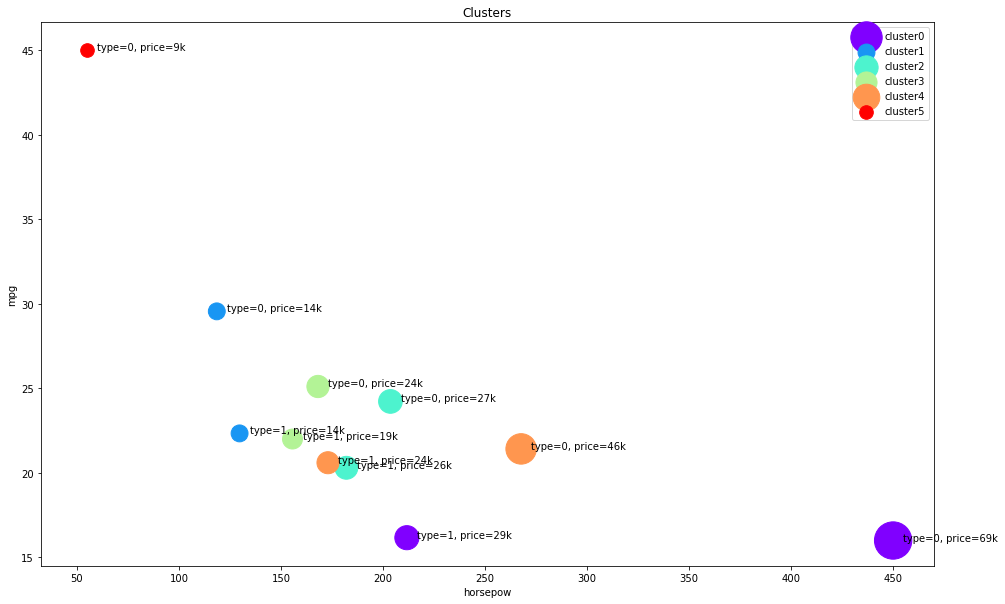

In [37]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline


#!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv


df = pd.read_csv('cars_clus.csv')
print ("Shape of dataset: ", df.shape)
df.head(5)

#Cleaning of NULL Data rows
print ("Shape of dataset before cleaning: ", df.size)
df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df.size)
df.head(5)


#slicing
featureset = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

#Normalization
from sklearn.preprocessing import MinMaxScaler
m_max = MinMaxScaler()
x = featureset.to_numpy()
featureset_n = m_max.fit_transform(x)


#CLUSTERING using SCIPY
#create distance matrix
print ('\n\n\n\nCLUSTERING using SCIPY')
import scipy
import scipy.spatial.distance as ssd
import pylab

leng = featureset_n.shape[0]

d_matrix = scipy.zeros([leng,leng])

for i in range(leng):
    for j in range(leng):
        d_matrix[i,j] = scipy.spatial.distance.euclidean(featureset_n[i],featureset_n[j])

ag_m = hierarchy.linkage(d_matrix, 'complete')
#ag_m = hierarchy.linkage(ssd.squareform(d_matrix), 'complete')

from scipy.cluster.hierarchy import fcluster
m_dist = 3
m_cluster =4
clusters = fcluster(ag_m, m_dist, criterion='distance')
#clusters = fcluster(ag_m, m_cluster, criterion='maxclust')
clusters

fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )
    
#dendro = hierarchy.dendrogram(ag_m,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')



#CLUSTERING using SCIKIT-LEARN
import matplotlib.cm as cm

def plotter (pdf,agglom):
    n_clusters = max(agglom.labels_)+1
    colors = cm.rainbow(np.linspace(0, 1, n_clusters))
    cluster_labels = list(range(0, n_clusters))

    # Create a figure of size 6 inches by 4 inches.
    plt.figure(figsize=(16,14))

    for color, label in zip(colors, cluster_labels):
        subset = pdf[pdf.cluster_ == label]
        for i in subset.index:
                plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
        plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
    #    plt.scatter(subset.horsepow, subset.mpg)
    plt.legend()
    plt.title('Clusters')
    plt.xlabel('horsepow')
    plt.ylabel('mpg')
    
    
    
    

dis_matrix = distance_matrix(featureset_n,featureset_n) 

sk_model = AgglomerativeClustering(n_clusters=6,linkage='complete')
sk_model.fit(dis_matrix)

df['cluster_'] = sk_model.labels_


plotter(pdf=df, agglom=sk_model)

df.groupby(['cluster_','type'])['cluster_'].count()
agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
print(agg_cars)

n_clusters = max(sk_model.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')